In [316]:
import pandas as pd
import datetime as dt

In [476]:
house_polls_2012 = pd.read_csv('data/final/12-US-House-poll-responses-clean.tsv', sep='\t', lineterminator='\n')
house_polls_2014 = pd.read_csv('data/final/14-US-House-poll-responses-clean.tsv', sep='\t', lineterminator='\n')


In [317]:
house_polls_2012.head()

,Democrat,Republican,Undecided,Other,Not Voting,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation
0,44.0,44.0,9.0,2.0,1.0,yougov-economist-16733,YouGov/Economist,2012-11-03,2012-11-05,NaN,Likely Voters,743.0,NaN,Internet,Nonpartisan,None
1,48.0,49.0,1.0,NaN,NaN,cnn-16606,CNN,2012-11-02,2012-11-04,NaN,Likely Voters,693.0,3.5,Live Phone,Nonpartisan,None
2,47.0,46.0,7.0,NaN,NaN,dailykos-seiu-ppp-d-16640,DailyKos/SEIU/PPP (D),2012-11-01,2012-11-04,NaN,Likely Voters,1300.0,2.7,Automated Phone,Sponsor,Dem
3,46.0,46.0,7.0,1.0,1.0,democracy-corps-d-16617,Democracy Corps (D),2012-11-01,2012-11-04,NaN,Likely Voters,1080.0,NaN,Live Phone,Pollster,Dem
4,46.0,46.0,5.0,3.0,NaN,rasmussen-16649,Rasmussen,2012-10-29,2012-11-04,NaN,Likely Voters,7000.0,NaN,Automated Phone,Nonpartisan,None


In [477]:
election_2012_date = dt.datetime(2012, 11, 6)
election_2014_date = dt.datetime(2014, 11, 4)

In [478]:
house_polls_2012['end_date'] = pd.to_datetime(house_polls_2012['end_date'])
house_polls_2014['end_date'] = pd.to_datetime(house_polls_2014['end_date'])


In [479]:
house_polls_2012['days_from_election'] =(election_2012_date -  house_polls_2012['end_date'])
house_polls_2014['days_from_election'] =(election_2014_date -  house_polls_2014['end_date'])

In [480]:
house_polls_2012['days_from_election'] = house_polls_2012['days_from_election'].apply(lambda x: int(x.days))
max_num = house_polls_2012['days_from_election'].max()

house_polls_2014['days_from_election'] = house_polls_2014['days_from_election'].apply(lambda x: int(x.days))
max_num_2014 = house_polls_2014['days_from_election'].max()

In [481]:
house_polls_2012['days_from_election'] =max_num - house_polls_2012['days_from_election']

house_polls_2014['days_from_election'] =max_num_2014 - house_polls_2014['days_from_election']




In [482]:
house_polls_2012['democrat_weight'] = house_polls_2012['Democrat']*house_polls_2012['days_from_election']

house_polls_2014['democrat_weight'] = house_polls_2014['Democrat']*house_polls_2014['days_from_election']

In [483]:
house_polls_2012['republican_weight'] = house_polls_2012['Republican']*house_polls_2012['days_from_election']
house_polls_2014['republican_weight'] = house_polls_2014['Republican']*house_polls_2014['days_from_election']

In [486]:
house_polls_2012['republican_avg'] = house_polls_2012['republican_weight'].sum()/house_polls_2012['days_from_election'].sum()
house_polls_2014['republican_avg'] = house_polls_2014['republican_weight'].sum()/house_polls_2014['days_from_election'].sum()




In [487]:
house_polls_2012['democrat_avg'] = house_polls_2012['democrat_weight'].sum()/house_polls_2012['days_from_election'].sum()
house_polls_2014['democrat_avg'] = house_polls_2014['democrat_weight'].sum()/house_polls_2014['days_from_election'].sum()

In [488]:
house_polls_2014


,Democrat,Republican,Undecided,Other,Not Voting,poll_slug,survey_house,start_date,end_date,question_text,...,observations,margin_of_error,mode,partisanship,partisan_affiliation,days_from_election,democrat_weight,republican_weight,republican_avg,democrat_avg
0,45.0,46.0,NaN,NaN,NaN,nbc-wsj-21278,NBC/WSJ,2014-10-30,2014-11-01,NaN,...,826.0,3.40,Live Phone,Nonpartisan,None,713,32085.0,32798.0,40.3462,41.551093
1,42.0,46.0,9.0,3.0,1.0,huffpost-yougov-21285,HuffPost/YouGov,2014-10-28,2014-10-30,NaN,...,802.0,4.10,Internet,Nonpartisan,None,711,29862.0,32706.0,40.3462,41.551093
2,45.0,44.0,7.0,4.0,NaN,fox-21158,FOX,2014-10-25,2014-10-27,NaN,...,734.0,3.50,Live Phone,Nonpartisan,None,708,31860.0,31152.0,40.3462,41.551093
3,42.0,50.0,4.0,2.0,1.0,cbs-21202,CBS,2014-10-23,2014-10-27,NaN,...,624.0,4.00,Live Phone,Nonpartisan,None,708,29736.0,35400.0,40.3462,41.551093
4,47.0,46.0,2.0,4.0,0.0,cnn-21117,CNN,2014-10-24,2014-10-26,NaN,...,540.0,4.00,Live Phone,Nonpartisan,None,707,33229.0,32522.0,40.3462,41.551093
5,43.0,42.0,11.0,3.0,NaN,usa-today-psrai-21233,USA Today/PSRAI,2014-10-23,2014-10-26,NaN,...,697.0,4.30,Live Phone,Nonpartisan,None,707,30401.0,29694.0,40.3462,41.551093
6,44.0,50.0,4.0,1.0,1.0,abc-post-21133,ABC/Post,2014-10-23,2014-10-26,NaN,...,758.0,4.00,Live Phone,Nonpartisan,None,707,31108.0,35350.0,40.3462,41.551093
7,41.0,43.0,12.0,4.0,NaN,rasmussen-21130,Rasmussen,2014-10-20,2014-10-26,NaN,...,3500.0,2.00,IVR/Online,Nonpartisan,None,707,28987.0,30401.0,40.3462,41.551093
8,41.0,52.0,7.0,NaN,NaN,nbc-wsj-annenberg-21284,NBC/WSJ/Annenberg,2014-10-17,2014-10-23,NaN,...,823.0,4.10,Live Phone,Nonpartisan,None,704,28864.0,36608.0,40.3462,41.551093
9,46.0,46.0,6.0,1.0,NaN,democracy-corps-d-21021,Democracy Corps (D),2014-10-16,2014-10-21,NaN,...,698.0,3.00,Live Phone,Pollster,Dem,702,32292.0,32292.0,40.3462,41.551093


In [781]:
df_election_2012 = pd.read_excel('data/final/federalelections2012.xls', sheet_name=11)
df_election_2014 = pd.read_excel('data/final/federalelections2014.xls', sheet_name=7)
df_election_2016 = pd.read_excel('data/final/federalelections2016.xlsx', sheet_name=12)

In [782]:
df_election_2016.columns

Index([                                      1,
                          'STATE ABBREVIATION',
                                       'STATE',
                                           'D',
                                     'FEC ID#',
                                         '(I)',
                      'CANDIDATE NAME (First)',
                       'CANDIDATE NAME (Last)',
                              'CANDIDATE NAME',
                                 'TOTAL VOTES',
                                       'PARTY',
                               'PRIMARY VOTES',
                                   'PRIMARY %',
                                'RUNOFF VOTES',
                                    'RUNOFF %',
                              'GENERAL VOTES ',
                                   'GENERAL %',
               'GE RUNOFF ELECTION VOTES (LA)',
                   'GE RUNOFF ELECTION % (LA)',
       'COMBINED GE PARTY TOTALS (CT, NY, SC)',
                     'COMBINED % (CT, NY

In [783]:
df_election_2012.head()
df_election_2014.head()
df_election_2016.head()

,1,STATE ABBREVIATION,STATE,D,FEC ID#,(I),CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,GE RUNOFF ELECTION VOTES (LA),GE RUNOFF ELECTION % (LA),"COMBINED GE PARTY TOTALS (CT, NY, SC)","COMBINED % (CT, NY, SC)",GE WINNER INDICATOR,FOOTNOTES
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,01,H4AL01123,(I),Bradley,Byrne,"Byrne, Bradley",NaN,...,NaN,NaN,208083,0.963825,NaN,NaN,NaN,NaN,W,NaN
3,5,AL,Alabama,01,H6AL01060,NaN,Dean,Young,"Young, Dean",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,01,NaN,NaN,NaN,NaN,NaN,Party Votes:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [784]:
df_election_2012 = df_election_2012[df_election_2012['FEC ID#'].str.contains("n/a") == False]
df_election_2014 = df_election_2014[df_election_2014['FEC ID#'].str.contains("n/a") == False]
df_election_2016 = df_election_2016[df_election_2016['FEC ID#'].str.contains("n/a") == False]

In [785]:
df_election_2012.head()
df_elections_cleaned = df_election_2012[['STATE ABBREVIATION', 'D', '(I)','FEC ID#', 'CANDIDATE NAME', 'GENERAL %', 'GE WINNER INDICATOR']]

In [786]:
df_elections_cleaned_2014 = df_election_2014[['STATE ABBREVIATION', 'D', '(I)','FEC ID#', 'CANDIDATE NAME', 'GENERAL %', 'GE WINNER INDICATOR']]


df_elections_cleaned_2016 = df_election_2016[['STATE ABBREVIATION', 'D', '(I)','FEC ID#', 'CANDIDATE NAME', 'GENERAL %', 'GE WINNER INDICATOR']]



In [806]:

df_election_2016[df_election_2016['FEC ID#']=='H2AZ08102 ']

,1,STATE ABBREVIATION,STATE,D,FEC ID#,(I),CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,GE RUNOFF ELECTION VOTES (LA),GE RUNOFF ELECTION % (LA),"COMBINED GE PARTY TOTALS (CT, NY, SC)","COMBINED % (CT, NY, SC)",GE WINNER INDICATOR,FOOTNOTES
94,96,AZ,Arizona,02,H2AZ08102,(I),Martha,McSally,"McSally, Martha",NaN,...,NaN,NaN,179806,0.569585,NaN,NaN,NaN,NaN,W,NaN


In [788]:
raising_2012 = pd.read_csv('data/final/weball12.txt', sep='|', lineterminator='\n', header=None)
raising_2014 = pd.read_csv('data/final/weball14.txt', sep='|', lineterminator='\n', header=None)
raising_2016 = pd.read_csv('data/final/weball16.txt', sep='|', lineterminator='\n', header=None)



In [789]:
cols = pd.read_excel('data/final/fundraising_mapping.xlsx', header=None)
col_list = cols[0].values.tolist()[0:30]
col_list

['CAND_ID',
 'CAND_NAME',
 'CAND_ICI',
 'PTY_CD',
 'CAND_PTY_AFFILIATION',
 'TTL_RECEIPTS',
 'TRANS_FROM_AUTH',
 'TTL_DISB',
 'TRANS_TO_AUTH',
 'COH_BOP',
 'COH_COP',
 'CAND_CONTRIB',
 'CAND_LOANS',
 'OTHER_LOANS',
 'CAND_LOAN_REPAY',
 'OTHER_LOAN_REPAY',
 'DEBTS_OWED_BY',
 'TTL_INDIV_CONTRIB',
 'CAND_OFFICE_ST',
 'CAND_OFFICE_DISTRICT',
 'SPEC_ELECTION',
 'PRIM_ELECTION',
 'RUN_ELECTION',
 'GEN_ELECTION',
 'GEN_ELECTION_PRECENT',
 'OTHER_POL_CMTE_CONTRIB',
 'POL_PTY_CONTRIB',
 'CVG_END_DT',
 'INDIV_REFUNDS',
 'CMTE_REFUNDS']

In [790]:
raising_2012.columns = col_list
raising_2014.columns = col_list
raising_2016.columns = col_list


In [776]:
raising_2014.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,H2AK00101,"MOORE, MATTHEW EDWARD",C,1,DEM,60679.50,0.0,60679.50,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,05/13/2014,0.0,0.0
1,H4AK00057,"VONDERSAAR, FRANK J",C,1,DEM,500.00,0.0,400.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,07/31/2014,0.0,0.0
2,H4AK00123,"DUNBAR, FORREST",C,1,DEM,237456.58,0.0,230088.83,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,1000.00,3324.6,12/31/2014,0.0,0.0
3,H0AK00097,"COX, JOHN R.",C,2,REP,0.00,0.0,2391.00,0.0,1042.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.0,12/31/2014,0.0,0.0
4,H6AK00045,"YOUNG, DONALD E",I,2,REP,788960.16,0.0,809039.20,0.0,508299.46,...,NaN,NaN,NaN,NaN,NaN,289540.14,0.0,12/31/2014,6450.0,400.0


In [818]:
raising_2012_subset = raising_2012[['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS']]

In [819]:
raising_2014_subset = raising_2014[['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS']]

In [820]:
raising_2016_subset = raising_2016[['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS']]

In [821]:
df_election_2014_subset

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY
CAND_ID,,,,,,,,,
H4AL01123,AL,(I),01,H4AL01123,Bradley,Byrne,0.681569,W,R
H4AL01156,AL,NaN,01,H4AL01156,Burton R.,LeFlore,0.317130,NaN,D
H0AL02087,AL,(I),02,H0AL02087,Martha,Roby,0.673425,W,R
H4AL02071,AL,NaN,02,H4AL02071,Erick,Wright,0.325641,NaN,D
H2AL03032,AL,(I),03,H2AL03032,Mike,Rogers,0.661205,W,R
H4AL03053,AL,NaN,03,H4AL03053,Thomas,Casson,NaN,NaN,R
H4AL03061,AL,NaN,03,H4AL03061,Jesse T.,Smith,0.337224,NaN,D
H6AL04098,AL,(I),04,H6AL04098,Robert,Aderholt,0.985744,W,R
H0AL05163,AL,(I),05,H0AL05163,Mo,Brooks,0.744241,W,R


In [822]:
df_election_2012_subset = df_election_2012[['STATE ABBREVIATION', '(I)','D', 'FEC ID#', 'CANDIDATE NAME (First)', 
                                           'CANDIDATE NAME (Last)', 'GENERAL %', 'GE WINNER INDICATOR', 'PARTY']]

df_election_2014_subset = df_election_2014[['STATE ABBREVIATION', '(I)','D', 'FEC ID#', 'CANDIDATE NAME (First)', 
                                           'CANDIDATE NAME (Last)', 'GENERAL %', 'GE WINNER INDICATOR', 'PARTY']]



df_election_2016_subset = df_election_2016[['STATE ABBREVIATION', '(I)','D', 'FEC ID#', 'CANDIDATE NAME (First)', 
                                           'CANDIDATE NAME (Last)', 'GENERAL %', 'GE WINNER INDICATOR', 'PARTY']]

In [823]:
df_election_2016[df_election_2016['FEC ID#'] == 'H2AZ08102']

,1,STATE ABBREVIATION,STATE,D,FEC ID#,(I),CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,GE RUNOFF ELECTION VOTES (LA),GE RUNOFF ELECTION % (LA),"COMBINED GE PARTY TOTALS (CT, NY, SC)","COMBINED % (CT, NY, SC)",GE WINNER INDICATOR,FOOTNOTES


In [824]:
df_election_2012_subset.head()
df_election_2012_subset['CAND_ID'] = df_election_2012_subset['FEC ID#'].apply(lambda x:str(x).strip())
raising_2012_subset['CAND_ID'] = raising_2012_subset['CAND_ID'].apply(lambda x:str(x).strip())



df_election_2014_subset['CAND_ID'] = df_election_2014_subset['FEC ID#'].apply(lambda x:str(x).strip())
raising_2014_subset['CAND_ID'] = raising_2014_subset['CAND_ID'].apply(lambda x:str(x).strip())


df_election_2016_subset['CAND_ID'] = df_election_2016_subset['FEC ID#'].apply(lambda x:str(x).strip())
raising_2016_subset['CAND_ID'] = raising_2016_subset['CAND_ID'].apply(lambda x:str(x).strip())

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [825]:
df_election_2016_subset[df_election_2016_subset['CAND_ID']=='H2AZ08102']

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY,CAND_ID
94,AZ,(I),02,H2AZ08102,Martha,McSally,0.569585,W,R,H2AZ08102


In [826]:
raising_2012_subset = raising_2012_subset.set_index('CAND_ID')
df_election_2012_subset = df_election_2012_subset.set_index('CAND_ID')

In [827]:
raising_2014_subset = raising_2014_subset.set_index('CAND_ID')
df_election_2014_subset = df_election_2014_subset.set_index('CAND_ID')

In [828]:
raising_2016_subset = raising_2016_subset.set_index('CAND_ID')
df_election_2016_subset = df_election_2016_subset.set_index('CAND_ID')

In [829]:
joined_data = df_election_2012_subset.join(raising_2012_subset, on='CAND_ID')


In [834]:
raising_2016_subset[raising_2016_subset.index=='H2AZ08102']
df_election_2016_subset[df_election_2016_subset.index=='H2AZ08102']

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY
CAND_ID,,,,,,,,,
H2AZ08102,AZ,(I),02,H2AZ08102,Martha,McSally,0.569585,W,R


In [832]:
raising_2016_subset[raising_2016_subset['CAND_ICI'] =='H2AZ08102']

,CAND_NAME,CAND_ICI,CAND_PTY_AFFILIATION,TTL_RECEIPTS
CAND_ID,,,,


In [751]:
raising_2016_subset.info()
df_election_2016_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2906 entries, H4AK00123 to S4WY00105
Data columns (total 4 columns):
CAND_NAME               2906 non-null object
CAND_ICI                2860 non-null object
CAND_PTY_AFFILIATION    2905 non-null object
TTL_RECEIPTS            2906 non-null float64
dtypes: float64(1), object(3)
memory usage: 113.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, H4AL01123 to H6WY00175
Data columns (total 9 columns):
STATE ABBREVIATION        2111 non-null object
(I)                       450 non-null object
D                         2110 non-null object
FEC ID#                   2111 non-null object
CANDIDATE NAME (First)    2108 non-null object
CANDIDATE NAME (Last)     2110 non-null object
GENERAL %                 1290 non-null float64
GE WINNER INDICATOR       494 non-null object
PARTY                     2110 non-null object
dtypes: float64(1), object(8)
memory usage: 164.9+ KB


In [835]:
joined_data_2014 = df_election_2014_subset.join(raising_2014_subset, on='CAND_ID')

joined_data_2016 = df_election_2016_subset.join(raising_2016_subset, on='CAND_ID')

In [836]:
joined_data.info()
thing = joined_data_2016[joined_data_2016['TTL_RECEIPTS'].isnull()]
thing[thing['GE WINNER INDICATOR']=='W']

<class 'pandas.core.frame.DataFrame'>
Index: 2707 entries, H2AL01077 to S2WY00133
Data columns (total 13 columns):
STATE ABBREVIATION        2707 non-null object
(I)                       489 non-null object
D                         2707 non-null object
FEC ID#                   2707 non-null object
CANDIDATE NAME (First)    2704 non-null object
CANDIDATE NAME (Last)     2707 non-null object
GENERAL %                 1485 non-null float64
GE WINNER INDICATOR       483 non-null object
PARTY                     2707 non-null object
CAND_NAME                 1827 non-null object
CAND_ICI                  1827 non-null object
CAND_PTY_AFFILIATION      1824 non-null object
TTL_RECEIPTS              1827 non-null float64
dtypes: float64(2), object(11)
memory usage: 296.1+ KB


,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY,CAND_NAME,CAND_ICI,CAND_PTY_AFFILIATION,TTL_RECEIPTS
CAND_ID,,,,,,,,,,,,,
H4PA03117,PA,(I),03,H4PA03117,Mike,Kelly,0.972087,W,R,NaN,NaN,NaN,NaN
H6WA03234,WA,(I),03,H6WA03234,Jaime Herrera,Beutler,0.617527,W,R,NaN,NaN,NaN,NaN
H6WA05171,WA,(I),05,H6WA05171,Cathy McMorris,Rodgers,0.596410,W,R,NaN,NaN,NaN,NaN


In [727]:
joined_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, H4AL01123 to H6WY00175
Data columns (total 13 columns):
STATE ABBREVIATION        2111 non-null object
(I)                       450 non-null object
D                         2110 non-null object
FEC ID#                   2111 non-null object
CANDIDATE NAME (First)    2108 non-null object
CANDIDATE NAME (Last)     2110 non-null object
GENERAL %                 1290 non-null float64
GE WINNER INDICATOR       494 non-null object
PARTY                     2110 non-null object
CAND_NAME                 986 non-null object
CAND_ICI                  984 non-null object
CAND_PTY_AFFILIATION      985 non-null object
TTL_RECEIPTS              986 non-null float64
dtypes: float64(2), object(11)
memory usage: 230.9+ KB


In [837]:
#can't match everybody, but don't think that's a huge issue
joined_data_2016[joined_data_2016['(I)'].notnull() & joined_data_2016['CAND_ICI'].isnull()]

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY,CAND_NAME,CAND_ICI,CAND_PTY_AFFILIATION,TTL_RECEIPTS
CAND_ID,,,,,,,,,,,,,
H6NE01119,NE,(I),01,H6NE01119,Daniel M.,Wik,0.305474,NaN,D,NaN,NaN,NaN,NaN
H4PA03117,PA,(I),03,H4PA03117,Mike,Kelly,0.972087,W,R,NaN,NaN,NaN,NaN
H6WA03234,WA,(I),03,H6WA03234,Jaime Herrera,Beutler,0.617527,W,R,NaN,NaN,NaN,NaN
H6WA05171,WA,(I),05,H6WA05171,Cathy McMorris,Rodgers,0.596410,W,R,NaN,NaN,NaN,NaN


In [838]:
joined_data_2016[joined_data_2016['(I)'].notnull() & joined_data_2016['CAND_ICI'].isnull()]

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY,CAND_NAME,CAND_ICI,CAND_PTY_AFFILIATION,TTL_RECEIPTS
CAND_ID,,,,,,,,,,,,,
H6NE01119,NE,(I),01,H6NE01119,Daniel M.,Wik,0.305474,NaN,D,NaN,NaN,NaN,NaN
H4PA03117,PA,(I),03,H4PA03117,Mike,Kelly,0.972087,W,R,NaN,NaN,NaN,NaN
H6WA03234,WA,(I),03,H6WA03234,Jaime Herrera,Beutler,0.617527,W,R,NaN,NaN,NaN,NaN
H6WA05171,WA,(I),05,H6WA05171,Cathy McMorris,Rodgers,0.596410,W,R,NaN,NaN,NaN,NaN


In [666]:
joined_data.loc[joined_data.index=='H81D02064','CAND_ICI'] = 'I'
joined_data.loc[joined_data.index=='H6IA01055','CAND_ICI'] = 'I'
joined_data.loc[joined_data.index=='H8HY02031','CAND_ICI'] = 'I'
joined_data.loc[joined_data.index=='H8NE02129','CAND_ICI'] = 'I'
joined_data.loc[joined_data.index=='H8NE02129','CAND_ICI'] = 'I'
joined_data.loc[joined_data.index=='H6OH23033','CAND_ICI'] = 'I'

In [667]:
joined_data_2014.loc[joined_data_2014.index=='H8CA44034','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H8FL22038','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H81D02064','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H6IL02124','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H0IL15053','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H6IA01055','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H8HY02031','CAND_ICI'] = 'I'

joined_data_2014.loc[joined_data_2014.index=='H6MA07101','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='S0MA00109','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H0MI08042','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H2NJ04165','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H6OH23033','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H6PA04110','CAND_ICI'] = 'I'

joined_data_2014.loc[joined_data_2014.index=='H8NE02129','CAND_ICI'] = 'I'
joined_data_2014.loc[joined_data_2014.index=='H2PA06080','CAND_ICI'] = 'I'


In [839]:
joined_data_2016.loc[joined_data_2016.index=='H6NE01119','CAND_ICI'] = 'I'
joined_data_2016.loc[joined_data_2016.index=='H4PA03117','CAND_ICI'] = 'I'
joined_data_2016.loc[joined_data_2016.index=='H6WA03234','CAND_ICI'] = 'I'
joined_data_2016.loc[joined_data_2016.index=='H6WA05171','CAND_ICI'] = 'I'

In [840]:
import numpy as np

In [841]:
joined_data_no_null = joined_data[joined_data['TTL_RECEIPTS'].notnull()]
joined_data_no_null['TTL_RECEIPTS'] = joined_data_no_null['TTL_RECEIPTS'].apply(lambda x: max(0.1, x))
joined_data_no_null['money_raised_log'] = joined_data_no_null['TTL_RECEIPTS'].apply(lambda x: np.log(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [842]:

joined_data_no_null_2014 = joined_data_2014[joined_data_2014['TTL_RECEIPTS'].notnull()]
joined_data_no_null_2014['TTL_RECEIPTS'] = joined_data_no_null_2014['TTL_RECEIPTS'].apply(lambda x: max(0.1, x))
joined_data_no_null_2014['money_raised_log'] = joined_data_no_null_2014['TTL_RECEIPTS'].apply(lambda x: np.log(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [843]:

joined_data_no_null_2016 = joined_data_2016[joined_data_2016['TTL_RECEIPTS'].notnull()]
joined_data_no_null_2016['TTL_RECEIPTS'] = joined_data_no_null_2016['TTL_RECEIPTS'].apply(lambda x: max(0.1, x))
joined_data_no_null_2016['money_raised_log'] = joined_data_no_null_2016['TTL_RECEIPTS'].apply(lambda x: np.log(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [671]:
joined_data_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, H2AL01077 to S6WY00068
Data columns (total 14 columns):
STATE ABBREVIATION        1814 non-null object
(I)                       483 non-null object
D                         1814 non-null object
FEC ID#                   1814 non-null object
CANDIDATE NAME (First)    1814 non-null object
CANDIDATE NAME (Last)     1814 non-null object
GENERAL %                 1030 non-null float64
GE WINNER INDICATOR       479 non-null object
PARTY                     1814 non-null object
CAND_NAME                 1814 non-null object
CAND_ICI                  1814 non-null object
CAND_PTY_AFFILIATION      1811 non-null object
TTL_RECEIPTS              1814 non-null float64
money_raised_log          1814 non-null float64
dtypes: float64(3), object(11)
memory usage: 212.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eb91128>,
      dtype=object)

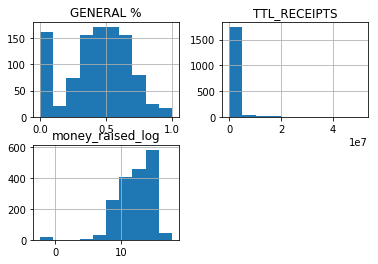

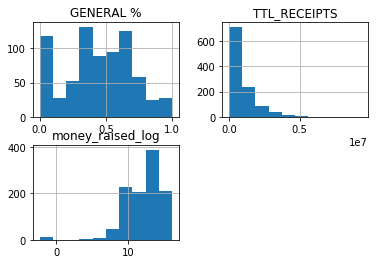

In [672]:
joined_data_no_null.hist()
joined_data_no_null_2014.hist()

In [844]:
def winner_func(x):
    if x == 'W':
        return 1
    else:
        return 0
def incumbent_func(x):
    if x == 'I':
        return 1
    else:
        return 0

In [845]:
joined_data_no_null['win'] = joined_data_no_null['GE WINNER INDICATOR'].apply(lambda x: winner_func(x))
joined_data_no_null['incumbent'] = joined_data_no_null['CAND_ICI'].apply(lambda x: incumbent_func(x))


joined_data_no_null_2014['win'] = joined_data_no_null_2014['GE WINNER INDICATOR'].apply(lambda x: winner_func(x))
joined_data_no_null_2014['incumbent'] = joined_data_no_null_2014['CAND_ICI'].apply(lambda x: incumbent_func(x))

joined_data_no_null_2016['win'] = joined_data_no_null_2016['GE WINNER INDICATOR'].apply(lambda x: winner_func(x))
joined_data_no_null_2016['incumbent'] = joined_data_no_null_2016['CAND_ICI'].apply(lambda x: incumbent_func(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [846]:
X = joined_data_no_null[['money_raised_log','incumbent']]
y = joined_data_no_null['win']

X_2014 = joined_data_no_null_2014[['money_raised_log','incumbent']]
y_2014 = joined_data_no_null_2014['win']

X_2016 = joined_data_no_null_2016[['money_raised_log','incumbent']]
y_2016 = joined_data_no_null_2016['win']

In [847]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [677]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [678]:
from sklearn.linear_model import LogisticRegression

In [679]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [680]:
pred = lr.predict(X_test)

In [681]:
lr.score(X_test, y_test)

0.9185022026431718

In [682]:
from sklearn.metrics import classification_report, confusion_matrix

In [683]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       341
          1       0.86      0.81      0.83       113

avg / total       0.92      0.92      0.92       454



In [684]:
#2014 data

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X_2016, y_2016)

In [849]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [850]:
pred = lr.predict(X_test)

In [851]:
lr.score(X_test, y_test)

0.9345238095238095

In [852]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95       199
          1       0.96      0.88      0.92       137

avg / total       0.94      0.93      0.93       336



In [853]:
from sklearn.dummy import DummyClassifier

In [854]:
dummy = DummyClassifier()

In [855]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [856]:
dummy_pred = dummy.predict(X_test)

In [857]:
print(classification_report(y_test, dummy_pred))

             precision    recall  f1-score   support

          0       0.60      0.65      0.62       199
          1       0.42      0.36      0.39       137

avg / total       0.52      0.53      0.53       336



In [858]:
from sklearn.metrics import accuracy_score

In [859]:
accuracy_score(y_test, pred)

0.9345238095238095

In [860]:
accuracy_score(y_test, dummy_pred)

0.5327380952380952

In [861]:
#adding in who is the president

In [862]:
joined_data_no_null.head()

,STATE ABBREVIATION,(I),D,FEC ID#,CANDIDATE NAME (First),CANDIDATE NAME (Last),GENERAL %,GE WINNER INDICATOR,PARTY,CAND_NAME,CAND_ICI,CAND_PTY_AFFILIATION,TTL_RECEIPTS,money_raised_log,win,incumbent
CAND_ID,,,,,,,,,,,,,,,,
H2AL01077,AL,(I),01,H2AL01077,Jo,Bonner,0.978562,W,R,"BONNER, JOSIAH ROBIAS",I,REP,1140566.63,13.947036,1,1
H2AL01176,AL,NaN,01,H2AL01176,Dean,Young,NaN,NaN,R,"YOUNG, LARRY DEAN JR",C,REP,238644.85,12.382732,0,0
H2AL01184,AL,NaN,01,H2AL01184,Pete,Riehm,NaN,NaN,R,"RIEHM, PETER (PETE) J A",C,REP,39833.90,10.592474,0,0
H0AL01030,AL,NaN,01,H0AL01030,Peter,Gounares,NaN,NaN,R,"GOUNARES, PETER HUNTER",C,REP,15075.00,9.620793,0,0
H0AL02087,AL,(I),02,H0AL02087,Martha,Roby,0.635989,W,R,"ROBY, MARTHA",I,REP,1035717.36,13.850605,1,1


In [863]:
def party_match_pres(x):
    if x == 'D':
        return 1
    else:
        return 0

In [864]:
joined_data_no_null['party_match_pres'] = joined_data_no_null['PARTY'].apply(lambda x:party_match_pres(x))
joined_data_no_null_2014['party_match_pres'] = joined_data_no_null_2014['PARTY'].apply(lambda x:party_match_pres(x))
joined_data_no_null_2016['party_match_pres'] = joined_data_no_null_2016['PARTY'].apply(lambda x:party_match_pres(x))


/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [868]:
X = joined_data_no_null[['money_raised_log','incumbent', 'party_match_pres']]
X_2016 = joined_data_no_null_2016[['money_raised_log','incumbent', 'party_match_pres']]
y = joined_data_no_null['win']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [869]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [870]:
pred = lr.predict(X_2016)

In [872]:
print(classification_report(y_2016, pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       851
          1       0.95      0.87      0.91       491

avg / total       0.94      0.94      0.94      1342



array([[0.36910587, 3.11835333, 0.36404729]])

In [875]:
X_2016 = joined_data_no_null_2016[['money_raised_log','incumbent', 'party_match_pres']]
y_2016 = joined_data_no_null_2016['win']
X_train, X_test, y_train, y_test = train_test_split(X_2016, y_2016)

In [876]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(X_test, y_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       223
          1       0.97      0.88      0.92       113

avg / total       0.95      0.95      0.95       336



In [877]:
from sklearn.naive_bayes import GaussianNB

In [878]:
gauss = GaussianNB()

In [879]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [880]:
gauss.fit(X_train, y_train)

GaussianNB(priors=None)

In [881]:
pred = gauss.predict(X_test)

In [882]:
gauss.score(X_test, y_test)

0.8708971553610503

In [370]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93       326
          1       0.80      0.86      0.83       128

avg / total       0.90      0.90      0.90       454



In [384]:
joined_data_no_null[joined_data_no_null['win'] ==1].groupby('STATE ABBREVIATION').sum().to_excel('data/test.xlsx')

,money_raised_log,incumbent,party_match_pres
CAND_ID,,,
H2AL01077,13.947036,1,0
H2AL01176,12.382732,0,0
H2AL01184,10.592474,0,0
H0AL01030,9.620793,0,0
H0AL02087,13.850605,1,0
H2AL03032,13.883068,1,0
H2AL03099,8.264621,0,1
H6AL04098,14.036387,1,0
H2AL04055,9.514953,0,1


In [ ]:
#add in polling data

In [906]:
repub_poll = house_polls_2012.republican_avg.max()
dem_poll = house_polls_2012.democrat_avg.max()
repub_poll_2014 = house_polls_2014.republican_avg.max()
dem_poll_2014= house_polls_2014.democrat_avg.max()

In [907]:
def likelihood_2012(x):
    if x == "D":
        return dem_poll
    elif x == "R":
        return repub_poll
    else:
        return 0
    
def likelihood_2014(x):
    if x == "D":
        return dem_poll_2014
    elif x == "R":
        return repub_poll_2014
    else:
        return 0

In [615]:
joined_data_no_null['likelihood'] = joined_data_no_null.PARTY.apply(lambda x: likelihood(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [616]:
joined_data_no_null_2014['likelihood'] = joined_data_no_null_2014.PARTY.apply(lambda x: likelihood_2014(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [617]:
X = joined_data_no_null[['money_raised_log','incumbent', 'party_match_pres','likelihood']]
y = joined_data_no_null['win']
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_2014 = joined_data_no_null_2014[['money_raised_log','incumbent', 'party_match_pres','likelihood']]
y_2014 = joined_data_no_null_2014['win']
X_train, X_test, y_train, y_test = train_test_split(X_2014, y_2014)

In [618]:
gauss = GaussianNB()

In [619]:
gauss.fit(X_train, y_train)

GaussianNB(priors=None)

In [620]:
pred = gauss.predict(X_test)

In [621]:
gauss.score(X_test, y_test)

0.9221556886227545

In [622]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.98      0.89      0.93       198
          1       0.86      0.97      0.91       136

avg / total       0.93      0.92      0.92       334



In [623]:
lr = LogisticRegression()

In [624]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [625]:
pred = lr.predict(X_test)

In [626]:
lr.score(X_test, y_test)

0.9251497005988024

In [627]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.98      0.89      0.93       198
          1       0.86      0.98      0.91       136

avg / total       0.93      0.93      0.93       334



In [ ]:
#joining 2012 and 2014 data to predict 2016

In [ ]:
X = joined_data_no_null[['money_raised_log','incumbent', 'party_match_pres','likelihood']]
y = joined_data_no_null['win']
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_2014 = joined_data_no_null_2014[['money_raised_log','incumbent', 'party_match_pres','likelihood']]
y_2014 = joined_data_no_null_2014['win']
X_train, X_test, y_train, y_test = train_test_split(X_2014, y_2014)

In [886]:
data_2012 = joined_data_no_null.reset_index()
data_2014 = joined_data_no_null_2014.reset_index()
data_2016 = joined_data_no_null_2016.reset_index()

In [889]:
joined_data_train = pd.concat([data_2012, data_2014])

In [893]:
X_train = joined_data_train[['money_raised_log','incumbent', 'party_match_pres']]
y_train = joined_data_train['win']
X_test = data_2016[['money_raised_log','incumbent', 'party_match_pres']]
y_test = data_2016['win']

In [894]:
lr = LogisticRegression()

In [895]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [896]:
pred = lr.predict(X_test)

In [897]:
lr.score(X_test, y_test)

0.9351713859910581

In [900]:
print(classification_report(y_test, pred))

data_2016['pred'] = pred

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       851
          1       0.95      0.87      0.91       491

avg / total       0.94      0.94      0.93      1342



In [905]:
data_2016[data_2016['pred']==1].PARTY.value_counts()

R              212
D              166
WF              15
WEP             12
IDP              8
REF              7
CRV              7
DFL              5
W(IP)            4
R                3
D/IP             2
W(R)             2
R/IP             1
R/TRP            1
D/PRO/WF/IP      1
R                1
R/W              1
IND              1
R                1
W(D)             1
D/R              1
Name: PARTY, dtype: int64